In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.datasets import load_iris
# from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [2]:
figdir = "figures"
os.makedirs(figdir)

def savefig(fname):
    plt.savefig(os.path.join(figdir, fname))

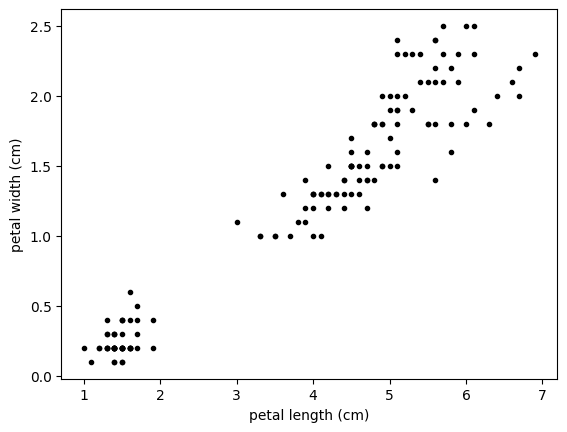

D:\Anaconda3\envs\torch2\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


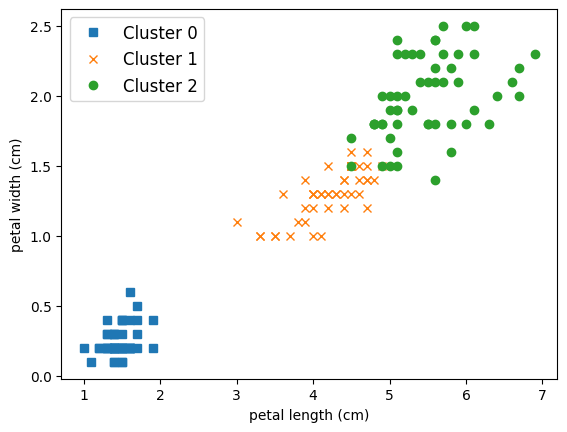

In [3]:
iris = load_iris()
X = iris.data

fig, ax = plt.subplots()
idx1 = 2
idx2 = 3
ax.scatter(X[:, idx1], X[:, idx2], c="k", marker=".")
ax.set(xlabel=iris.feature_names[idx1])
ax.set(ylabel=iris.feature_names[idx2])
savefig("iris-2d-unlabeled")
plt.show()


K = 3
y_pred = GaussianMixture(n_components=K, random_state=42).fit(X).predict(X)
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

colors = sns.color_palette()[0:K]
markers = ("s", "x", "o", "^", "v")
fig, ax = plt.subplots()
for k in range(0, K):
    ax.plot(
        X[y_pred == k, idx1],
        X[y_pred == k, idx2],
        color=colors[k],
        marker=markers[k],
        linestyle="None",
        label="Cluster {}".format(k),
    )
ax.set(xlabel=iris.feature_names[idx1])
ax.set(ylabel=iris.feature_names[idx2])
plt.legend(loc="upper left", fontsize=12)
savefig("iris-2d-gmm")
plt.show()